<h1 style="text-align:center"> PREVISÃO DE AVC </h1>

# CARREGANDO OS DADOS

In [1]:
import pandas as pd
import numpy as np

# Carregando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/gabicgama/Stroke-Prediction/main/notebook/csv/healthcare-dataset-stroke-data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df.drop("id", axis=1, inplace=True)

In [4]:
df.head(5)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#Como BMI tem valores missing vamos preencher com a moda pegando a ocorrencia zero pois é  primeira do array 
#from scipy.stats import mode
#df['bmi'].fillna(mode(df['bmi']).mode[0], inplace=True)

In [7]:
#Preenchendo valores de BMI com a média
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# PREPARAÇÃO E TRATAMENTO

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
# Dicionário para o genero - Transformando variável categórica
dict_gender = {}

i = 0

# Loop pelos dados dos gêneros
for genero in df['gender'].values:
    if genero not in dict_gender:
             dict_gender[genero] = i
             i += 1

In [13]:
print(dict_gender)

{'Male': 0, 'Female': 1, 'Other': 2}


In [14]:
# Dicionário para o casado - Transformando variável categórica
dict_ever_married = {}

i = 0

# Loop pelos dados dos casados
for casado in df['ever_married'].values:
    if casado not in dict_ever_married:
             dict_ever_married[casado] = i
             i += 1

In [15]:
print(dict_ever_married)

{'Yes': 0, 'No': 1}


In [16]:
# Dicionário para o tipo de trabalho
dict_work_type = {}

i = 0

# Loop pelos dados dos gêneros
for tipo in df['work_type'].values:
    if tipo not in dict_work_type:
             dict_work_type[tipo] = i
             i += 1

In [17]:
print(dict_work_type)

{'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}


In [18]:
# Dicionário para o tipo de residência
dict_residence_type = {}

i = 0

# Loop pelos dados dos tipos de residência
for tipo in df['Residence_type'].values:
    if tipo not in dict_residence_type:
             dict_residence_type[tipo] = i
             i += 1

In [19]:
print(dict_residence_type)

{'Urban': 0, 'Rural': 1}


In [20]:
# Dicionário para o smoke status
dict_smoking_status = {}

i = 0

# Loop pelos dados dos status do fumante
for status in df['smoking_status'].values:
    if status not in dict_smoking_status:
             dict_smoking_status[status] = i
             i += 1

In [21]:
print(dict_smoking_status)

{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}


In [22]:
#Define uma função genérica para transformar variável categoriacas em numéricas usando a função replace
def converte(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [23]:
#convertendo as variáveis categoricas
df["genero"] = converte(df["gender"], dict_gender)
df["casado"] = converte(df["ever_married"], dict_ever_married)
df["tipo_trabalho"] = converte(df["work_type"], dict_work_type)
df["tipo_residencia"] = converte(df["Residence_type"], dict_residence_type)
df["fumante"] = converte(df["smoking_status"], dict_smoking_status)
   

In [24]:
#Criando faixas de idades
lst = []
for age in df['age'].values:
    if age < 18.0:
        lst.append(1)
    elif age < 25.0:
        lst.append(2)
    elif age < 35.0:
        lst.append(3)
    elif age < 45.0:
        lst.append(4)
    elif age < 55.0:
        lst.append(5)
    elif age < 65.0:
        lst.append(6)
    elif age < 75.0:
        lst.append(7)
    else:
        lst.append(8)
        
(df['idade']) = lst

In [25]:
df['idade'].count


<bound method Series.count of 0       7
1       6
2       8
3       5
4       8
       ..
5105    8
5106    8
5107    4
5108    5
5109    4
Name: idade, Length: 5110, dtype: int64>

In [26]:
#Apagando as colunas categoricas
del df['age']
del df['gender']
del df['ever_married']
del df['work_type']
del df['Residence_type']
del df['smoking_status']

In [27]:
#printando nomes das colunas
#for atb in df:
#    print(atb) 

In [28]:
import statsmodels.formula.api as smf
# Criando o Modelo de Regressão usando o algoritmo OLS 
#estimativa = smf.ols(formula = 'stroke ~ genero + age + hypertension + heart_disease + avg_glucose_level + casado + tipo_trabalho + tipo_residencia + fumante + bmi', data = df)

estimativa = smf.ols(formula = 'stroke ~ bmi', data = df)

# Treinando o Modelo de Regressão
modelo = estimativa.fit()

# Imprimindo o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.669
Date:                Sun, 26 Jun 2022   Prob (F-statistic):            0.00984
Time:                        20:02:40   Log-Likelihood:                 600.13
No. Observations:                5110   AIC:                            -1196.
Df Residuals:                    5108   BIC:                            -1183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0196      0.012      1.677      0.0

In [29]:
df.rename(columns={'idade':'age','genero':'gender','casado':'ever_married','tipo_trabalho':'work_type','tipo_residencia':'residence_type','fumante':'smoking_status'},
          inplace=True)

In [30]:
#Avaliando os valores minimos, máximos, média e desvio padrão
for atb in ('age', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'):
    print('Variavel {} minimo {} maximo {} media {} desvio padrao {}'.format(atb, df[atb].min(), 
                                                                                  df[atb].max(),
                                                                                  df[atb].mean(),
                                                                                  df[atb].std()))
                                                                                     

Variavel age minimo 1 maximo 8 media 4.384344422700587 desvio padrao 2.245159537615854
Variavel gender minimo 0 maximo 2 media 0.5863013698630137 desvio padrao 0.4929411882263363
Variavel hypertension minimo 0 maximo 1 media 0.0974559686888454 desvio padrao 0.29660667423379117
Variavel heart_disease minimo 0 maximo 1 media 0.05401174168297456 desvio padrao 0.22606298750336543
Variavel ever_married minimo 0 maximo 1 media 0.34383561643835614 desvio padrao 0.47503352003736893
Variavel work_type minimo 0 maximo 4 media 0.8379647749510764 desvio padrao 1.1186977261081688
Variavel residence_type minimo 0 maximo 1 media 0.4919765166340509 desvio padrao 0.4999845441302679
Variavel avg_glucose_level minimo 55.12 maximo 271.74 media 106.1476771037182 desvio padrao 45.28356015058198
Variavel bmi minimo 10.3 maximo 97.6 media 28.862035225048924 desvio padrao 7.699562318787507
Variavel smoking_status minimo 0 maximo 3 media 1.5855185909980432 desvio padrao 1.0925223495694898
Variavel stroke minimo

# CORRELAÇÃO E COLINEARIDADE

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
#df.drop("id", axis=1, inplace=True)

In [33]:
df.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,residence_type,smoking_status,age
0,0,1,228.69,36.6,1,0,0,0,0,0,7
1,0,0,202.21,28.1,1,1,0,1,1,1,6
2,0,1,105.92,32.5,1,0,0,0,1,1,8
3,0,0,171.23,34.4,1,1,0,0,0,2,5
4,1,0,174.12,24.0,1,1,0,1,1,1,8


In [34]:
df.corr()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,residence_type,smoking_status,age
hypertension,1.000000,0.108306,0.174474,0.158293,0.127904,-0.021390,-0.164243,-0.075097,0.007913,-0.129012,0.272056
heart_disease,0.108306,1.000000,0.161857,0.036916,0.134914,-0.085749,-0.114644,-0.058263,-0.003092,-0.064671,0.262208
avg_glucose_level,0.174474,0.161857,1.000000,0.166876,0.131945,-0.054213,-0.155068,-0.068135,0.004946,-0.097732,0.239666
bmi,0.158293,0.036916,0.166876,1.000000,0.036110,0.025958,-0.334911,-0.341500,0.000277,-0.230661,0.302428
stroke,0.127904,0.134914,0.131945,0.036110,1.000000,-0.009200,-0.108340,-0.058224,-0.015458,-0.066393,0.246696
gender,-0.021390,-0.085749,-0.054213,0.025958,-0.009200,1.000000,-0.029366,-0.066212,-0.005529,-0.039693,0.024849
ever_married,-0.164243,-0.114644,-0.155068,-0.334911,-0.108340,-0.029366,1.000000,0.375944,0.006261,0.303694,-0.675972
work_type,-0.075097,-0.058263,-0.068135,-0.341500,-0.058224,-0.066212,0.375944,1.000000,-0.014573,0.307774,-0.382695
residence_type,0.007913,-0.003092,0.004946,0.000277,-0.015458,-0.005529,0.006261,-0.014573,1.000000,-0.004656,-0.016781
smoking_status,-0.129012,-0.064671,-0.097732,-0.230661,-0.066393,-0.039693,0.303694,0.307774,-0.004656,1.000000,-0.352540


<AxesSubplot:title={'center':'Correlação entre os atributos'}>

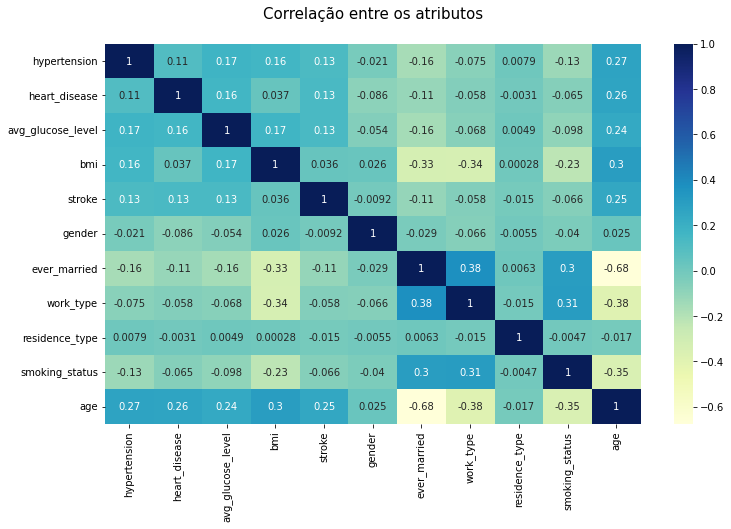

In [35]:
plt.figure(figsize=(12,7))
plt.title('Correlação entre os atributos', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), annot=True,cmap='YlGnBu')

In [36]:
# Detecting Multicollinearity with VIF – Python

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df[['age','gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature        VIF
0                 age   8.191334
1              gender   2.356298
2        hypertension   1.214736
3       heart_disease   1.166515
4        ever_married   2.340551
5           work_type   1.912006
6      residence_type   1.918026
7   avg_glucose_level   6.749972
8                 bmi  10.822353
9      smoking_status   3.306998
10             stroke   1.137361


# VISUALIZAÇÃO DOS DADOS

In [37]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [38]:
df['gender'].value_counts()

1    2994
0    2115
2       1
Name: gender, dtype: int64

In [39]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [40]:
df['ever_married'].value_counts()

0    3353
1    1757
Name: ever_married, dtype: int64

In [41]:
df['work_type'].value_counts()

0    2925
1     819
3     687
2     657
4      22
Name: work_type, dtype: int64

In [42]:
df['residence_type'].value_counts()

0    2596
1    2514
Name: residence_type, dtype: int64

In [43]:
df['smoking_status'].value_counts()

1    1892
3    1544
0     885
2     789
Name: smoking_status, dtype: int64

In [44]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [45]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

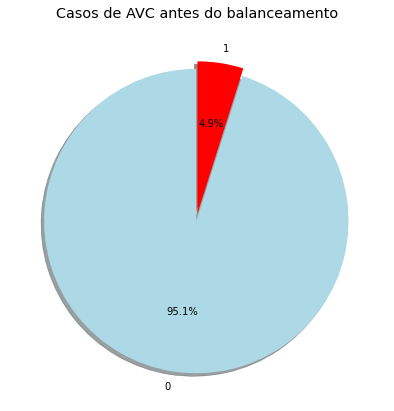

In [46]:
#Balanceamento de dados 

labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Casos de AVC antes do balanceamento')
plt.show()

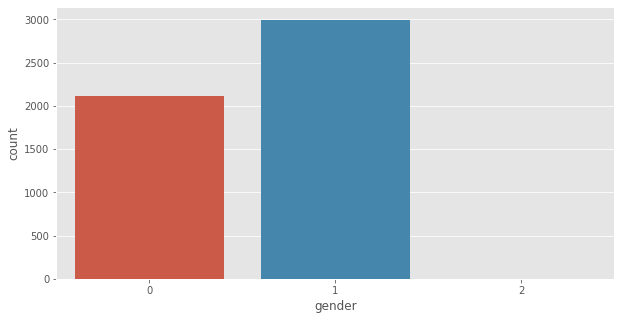

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender');

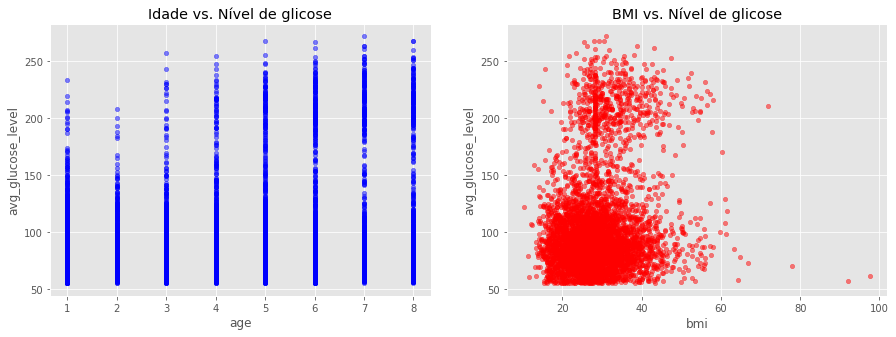

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='blue', ax=axes[0], title="Idade vs. Nível de glicose")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="BMI vs. Nível de glicose")
plt.show()

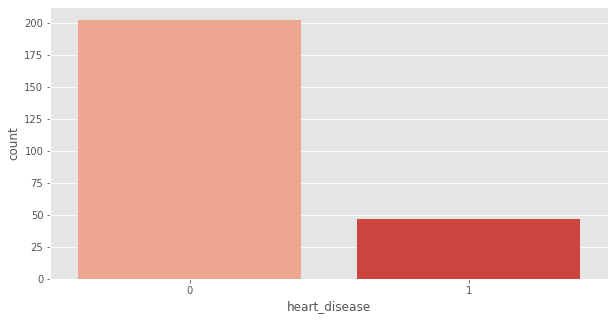

In [49]:
strok=df.loc[df['stroke']==1]
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

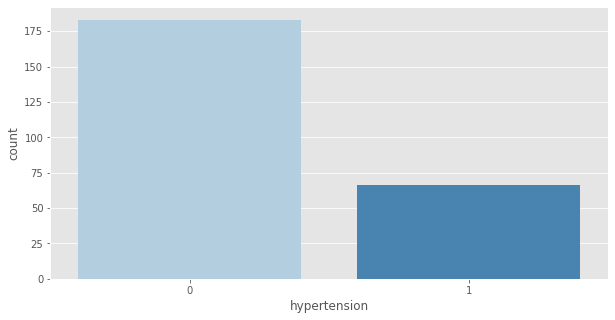

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Blues');

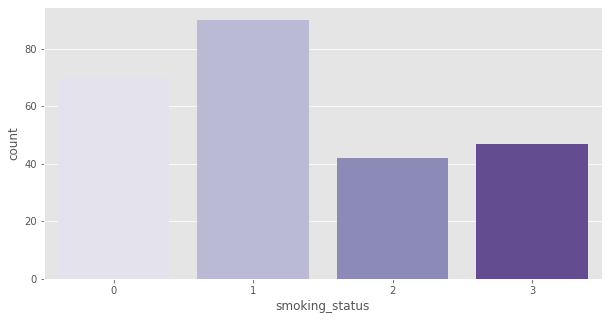

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='Purples');

/home/gabriela/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gabriela/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


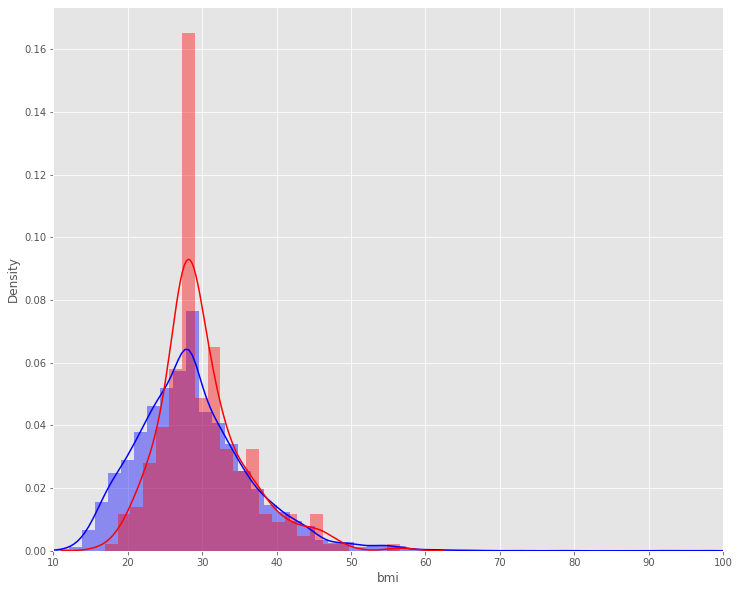

In [52]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='blue') # No Stroke 
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') # Stroke

#plt.title('Sem AVC vs Com AVC por IMC', fontsize=15)
plt.xlim([10,100])
plt.show()

/home/gabriela/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gabriela/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


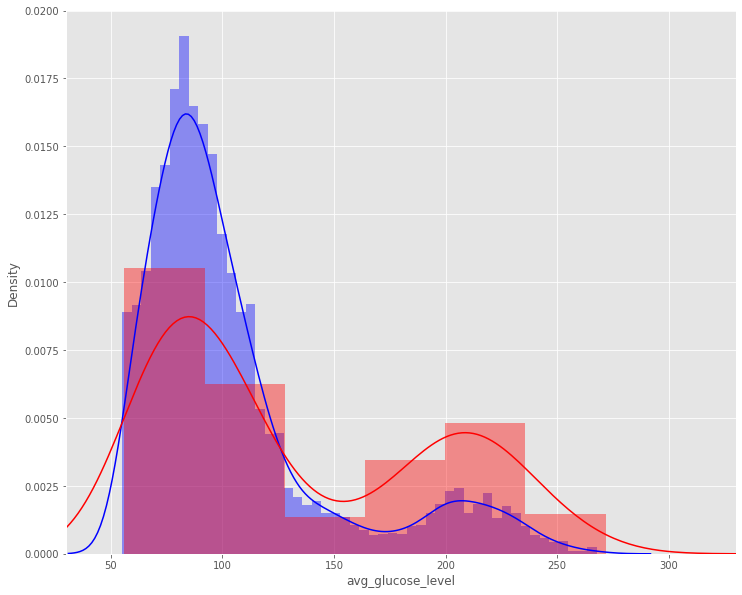

In [53]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='blue') # No Stroke
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke 

#plt.title('Sem AVC vs Com AVC por Glicemia', fontsize=15)
plt.xlim([30,330])
plt.show()

/home/gabriela/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gabriela/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


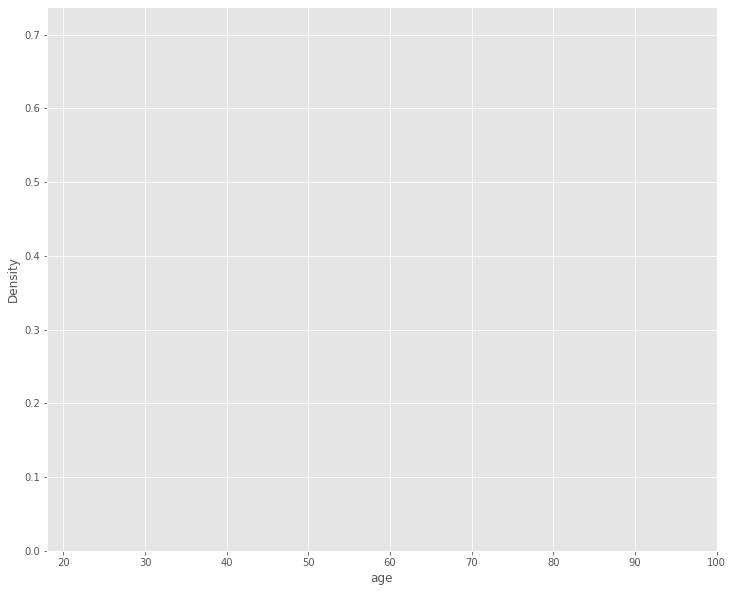

In [54]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["age"], color='blue') # No Stroke
sns.distplot(df[df['stroke'] == 1]["age"], color='red') # Stroke

#plt.title('Sem AVC vs Com AVC por Idade', fontsize=15)
plt.xlim([18,100])
plt.show()

# TESTANDO OS MODELOS

# BALANCEAMENTO


In [55]:
features = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender',
       'ever_married', 'work_type', 'residence_type', 'smoking_status', 'age']

In [56]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X , y = df[features],df["stroke"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

sm = SMOTE()

X_res, y_res = sm.fit_resample(x_train,y_train)

print("Antes do OverSampling, qtd de stroke '1': {}".format(sum(y==1)))
print("Antes do OverSampling, qtd de não stroke '0': {} \n".format(sum(y==0)))

print('Depois do OverSampling, shape do train_X: {}'.format(X_res.shape))
print('Depois do OverSampling, shape do train_y: {} \n'.format(y_res.shape))

print("Depois do OverSampling, qtd de stroke '1': {}".format(sum(y_res==1)))
print("Depois do OverSampling, qtd de não stroke '0': {}".format(sum(y_res==0)))

Antes do OverSampling, qtd de stroke '1': 249
Antes do OverSampling, qtd de não stroke '0': 4861 

Depois do OverSampling, shape do train_X: (6816, 10)
Depois do OverSampling, shape do train_y: (6816,) 

Depois do OverSampling, qtd de stroke '1': 3408
Depois do OverSampling, qtd de não stroke '0': 3408


In [57]:
a = y_res
unique, counts = np.unique(a, return_counts=True)
ab = dict(zip(unique, counts))
ab

{0: 3408, 1: 3408}

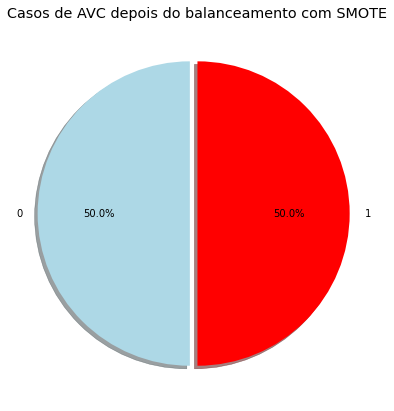

In [58]:
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []

for x, y in ab.items():
    labels.append(x)
    sizes.append(y)

# Plot
colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Casos de AVC depois do balanceamento com SMOTE')
plt.show()

# MODELAGEM E TREINAMENTO

In [59]:
#y = df['stroke']
#df.drop(columns=['stroke'],inplace=True)
#x = df

In [60]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [61]:
x_train = X_res
y_train = y_res

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6816, 10)
(1533, 10)
(6816,)
(1533,)


In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import xgboost as xgb

In [64]:
class ClassifierModel(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def predict(self, x):
        return self.clf.predict(x)

In [65]:
from sklearn.model_selection import cross_validate

In [66]:
def trainModel(model, x_train, y_train, x_test, n_folds):
    cv = KFold(n_splits= n_folds, random_state=0, shuffle=True)
    scoring = ['precision_macro', 'recall_macro']
    metrics = cross_validate(model.clf, x_train, y_train, cv=cv, scoring=scoring)
    cv_scores = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    y_pred = cross_val_predict(model.clf, x_train, y_train, cv=cv, n_jobs=-1)
    return cv_scores, y_pred, metrics

In [67]:
# Random Forest parameters
rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}
rfc_model = ClassifierModel(clf=RandomForestClassifier, params=rf_params)
rfc_scores, rfc_train_pred, rfc_metrics = trainModel(rfc_model,x_train, y_train, x_test, 5) # Random Forest
rfc_scores

array([0.82331378, 0.84152605, 0.82905356, 0.82245048, 0.83198826])

In [68]:
rfc_metrics

{'fit_time': array([0.84403706, 0.82953501, 0.81911421, 0.8320868 , 0.82833838]),
 'score_time': array([0.05462241, 0.05377913, 0.05397677, 0.05380821, 0.05374074]),
 'test_precision_macro': array([0.83231598, 0.85194878, 0.84337922, 0.83407898, 0.83715328]),
 'test_recall_macro': array([0.82024217, 0.84270061, 0.83000603, 0.81948637, 0.82876866])}

In [69]:
m1 = rfc_metrics['fit_time'].mean()
m2 = rfc_metrics['score_time'].mean()
m3 = rfc_metrics['test_precision_macro'].mean()
m4 = rfc_metrics['test_recall_macro'].mean()

m1, m2, m3, m4

(0.8306222915649414,
 0.05398545265197754,
 0.8397752469543723,
 0.8282407679045505)

In [70]:
# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':400,
    'max_depth': 5,
    'min_samples_leaf': 2,
}
etc_model = ClassifierModel(clf=ExtraTreesClassifier, params=et_params)
etc_scores, etc_train_pred, etc_metrics = trainModel(etc_model,x_train, y_train, x_test, 5) # Random Forest
etc_scores

array([0.80645161, 0.82685253, 0.81951577, 0.82758621, 0.8217168 ])

In [71]:
etc_metrics

{'fit_time': array([0.23888445, 0.2240417 , 0.2238276 , 0.23532987, 0.22747493]),
 'score_time': array([0.06778431, 0.0680418 , 0.06698751, 0.07159066, 0.0747602 ]),
 'test_precision_macro': array([0.81334586, 0.83474068, 0.8267782 , 0.83004926, 0.82667342]),
 'test_recall_macro': array([0.80265113, 0.82657029, 0.81604836, 0.81796082, 0.81999134])}

In [72]:
m1 = etc_metrics['fit_time'].mean()
m2 = etc_metrics['score_time'].mean()
m3 = etc_metrics['test_precision_macro'].mean()
m4 = etc_metrics['test_recall_macro'].mean()

m1, m2, m3, m4

(0.2299117088317871, 0.0698328971862793, 0.8263174834710922, 0.816644388434147)

In [73]:
# AdaBoost parameters
ada_params = {
    'n_estimators': 400,
    'learning_rate' : 0.65
}
ada_model = ClassifierModel(clf=AdaBoostClassifier, params=ada_params)
ada_scores, ada_train_pred, ada_metrics = trainModel(ada_model,x_train, y_train, x_test, 5) # Random Forest
ada_scores


array([0.85483871, 0.8429934 , 0.84739545, 0.84446075, 0.84739545])

In [74]:
ada_metrics

{'fit_time': array([1.15659618, 1.19173455, 1.2660532 , 1.13639832, 1.13839936]),
 'score_time': array([0.08383012, 0.08792949, 0.0828476 , 0.08298731, 0.08356309]),
 'test_precision_macro': array([0.85763422, 0.84351746, 0.84909579, 0.84669005, 0.84809964]),
 'test_recall_macro': array([0.8547739 , 0.84292131, 0.84747222, 0.84472527, 0.84731265])}

In [75]:
m1 = ada_metrics['fit_time'].mean()
m2 = ada_metrics['score_time'].mean()
m3 = ada_metrics['test_precision_macro'].mean()
m4 = ada_metrics['test_recall_macro'].mean()

m1, m2, m3, m4

(1.1778363227844237,
 0.08423151969909667,
 0.849007431236531,
 0.8474410711472066)

In [76]:
# Gradient Boosting parameters
gb_params = {
    'n_estimators': 400,
    'max_depth': 6,
}
gbc_model = ClassifierModel(clf=GradientBoostingClassifier, params=gb_params)
gbc_scores, gbc_train_pred, gbc_metrics = trainModel(gbc_model,x_train, y_train, x_test, 5) # Random Forest
gbc_scores


array([0.93181818, 0.93690389, 0.93983859, 0.94790902, 0.94350697])

In [77]:
gbc_metrics

{'fit_time': array([3.97531462, 3.40294671, 3.34899116, 3.27825856, 3.44026303]),
 'score_time': array([0.01597309, 0.01485467, 0.01384974, 0.01369786, 0.01532316]),
 'test_precision_macro': array([0.93309139, 0.93837958, 0.94006122, 0.94922742, 0.94631151]),
 'test_recall_macro': array([0.93103545, 0.93756406, 0.93986414, 0.9480957 , 0.94564267])}

In [78]:
m1 = gbc_metrics['fit_time'].mean()
m2 = gbc_metrics['score_time'].mean()
m3 = gbc_metrics['test_precision_macro'].mean()
m4 = gbc_metrics['test_recall_macro'].mean()

m1, m2, m3, m4

(3.489154815673828,
 0.014739704132080079,
 0.9414142239295537,
 0.9404404019203693)

In [79]:
# Gaussian NB Classifier parameters 
gnb_params = {
    'var_smoothing': 1e-09
    }
gnb_model = ClassifierModel(clf=GaussianNB, params=gnb_params)
gnb_scores, gnb_train_pred, gnb_metrics = trainModel(gnb_model,x_train, y_train, x_test, 5) 
gnb_scores

array([0.7829912 , 0.80264123, 0.78870139, 0.78650037, 0.80117388])

In [80]:
gnb_metrics

{'fit_time': array([0.00338387, 0.00349069, 0.00297928, 0.00345612, 0.00268149]),
 'score_time': array([0.0034492 , 0.00484085, 0.00342894, 0.00310063, 0.00327897]),
 'test_precision_macro': array([0.81728303, 0.83493888, 0.82790413, 0.82403513, 0.83133161]),
 'test_recall_macro': array([0.78274994, 0.80207068, 0.78908147, 0.78761988, 0.80061946])}

In [81]:
m1 = gnb_metrics['fit_time'].mean()
m2 = gnb_metrics['score_time'].mean()
m3 = gnb_metrics['test_precision_macro'].mean()
m4 = gnb_metrics['test_recall_macro'].mean()

m1, m2, m3, m4

(0.0031982898712158204,
 0.0036197185516357424,
 0.8270985544431901,
 0.7924282877055832)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier parameters 
knc_params = {
    'n_neighbors': 5
    }
knc_model = ClassifierModel(clf=KNeighborsClassifier, params=knc_params)
knc_scores, knc_train_pred, knc_metrics = trainModel(knc_model,x_train, y_train, x_test, 5) 
knc_scores

array([0.87829912, 0.88334556, 0.86940572, 0.86940572, 0.87527513])

In [83]:
knc_metrics

{'fit_time': array([0.00903201, 0.00694299, 0.00662947, 0.0064168 , 0.00600171]),
 'score_time': array([0.04678226, 0.04380608, 0.04134274, 0.03807807, 0.03714538]),
 'test_precision_macro': array([0.89872795, 0.90176897, 0.88703947, 0.88938255, 0.89628403]),
 'test_recall_macro': array([0.87813331, 0.88295373, 0.86964086, 0.87015581, 0.87485359])}

In [84]:
m1 = knc_metrics['fit_time'].mean()
m2 = knc_metrics['score_time'].mean()
m3 = knc_metrics['test_precision_macro'].mean()
m4 = knc_metrics['test_recall_macro'].mean()

m1, m2, m3, m4

(0.007004594802856446,
 0.0414309024810791,
 0.8946405932207139,
 0.8751474588676252)

In [85]:
#acc_pred_train = pd.DataFrame ({'RandomForest': rfc_scores.ravel(),
#     'ExtraTrees': etc_scores.ravel(),
#     'AdaBoost': ada_scores.ravel(),
#     'GaussianNB' : gnb_scores.ravel(),
#     'KNNClassifier' : knc_scores.ravel()
#    })
#acc_pred_train.head()

In [86]:
acc_pred_train = pd.DataFrame ({
     'AdaBoost': ada_scores.ravel(),
     'RandomForest': rfc_scores.ravel(),
     'ExtraTrees': etc_scores.ravel(),
     'GaussianNB' : gnb_scores.ravel(),
     'K-NearestNeighbor' : knc_scores.ravel(),
     'GradientBoosting' : gbc_scores.ravel()
    })
acc_pred_train.head().mean()

AdaBoost             0.847417
RandomForest         0.829666
ExtraTrees           0.820425
GaussianNB           0.792402
K-NearestNeighbor    0.875146
GradientBoosting     0.939995
dtype: float64

<AxesSubplot:title={'center':'Correlação entre os classificadores'}>

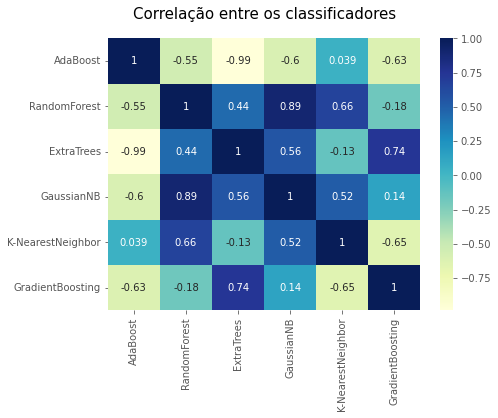

In [87]:
plt.figure(figsize=(7,5))
plt.title('Correlação entre os classificadores', y=1.05, size=15)
sns.heatmap(acc_pred_train.astype(float).corr(), annot=True,cmap='YlGnBu')

# Stacking Model

In [88]:
x_train = np.column_stack(( ada_train_pred, rfc_train_pred, etc_train_pred , gnb_train_pred, knc_train_pred, gbc_train_pred))

In [89]:
#x_train = np.column_stack(( rfc_train_pred, etc_train_pred, ada_train_pred, gnb_train_pred, knc_train_pred))

In [90]:
x_train.shape

(6816, 6)

In [91]:
def trainStackModel(x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed, shuffle=True)
    gbm = xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     scale_pos_weight=1).fit(x_train, y_train)
    
    scores = cross_val_score(gbm, x_train, y_train, scoring='accuracy', cv=cv)
    return scores

In [92]:
stackModel_scores = trainStackModel(x_train, y_train, x_test, 5, 0)

In [93]:
acc_pred_train

,AdaBoost,RandomForest,ExtraTrees,GaussianNB,K-NearestNeighbor,GradientBoosting
0,0.854839,0.823314,0.806452,0.782991,0.878299,0.931818
1,0.842993,0.841526,0.826853,0.802641,0.883346,0.936904
2,0.847395,0.829054,0.819516,0.788701,0.869406,0.939839
3,0.844461,0.822450,0.827586,0.786500,0.869406,0.947909
4,0.847395,0.831988,0.821717,0.801174,0.875275,0.943507


In [94]:
acc_pred_train['StackingModel'] = stackModel_scores
acc_pred_train

,AdaBoost,RandomForest,ExtraTrees,GaussianNB,K-NearestNeighbor,GradientBoosting,StackingModel
0,0.854839,0.823314,0.806452,0.782991,0.878299,0.931818,0.938416
1,0.842993,0.841526,0.826853,0.802641,0.883346,0.936904,0.936904
2,0.847395,0.829054,0.819516,0.788701,0.869406,0.939839,0.936170
3,0.844461,0.822450,0.827586,0.786500,0.869406,0.947909,0.947909
4,0.847395,0.831988,0.821717,0.801174,0.875275,0.943507,0.944974


In [95]:
stackModel_scores.mean()

0.9408747738191803

In [96]:
acc_pred_train.mean()

AdaBoost             0.847417
RandomForest         0.829666
ExtraTrees           0.820425
GaussianNB           0.792402
K-NearestNeighbor    0.875146
GradientBoosting     0.939995
StackingModel        0.940875
dtype: float64

# Deploy

In [97]:
model = xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     scale_pos_weight=1).fit(x_train, y_train)

In [98]:
import pickle
pickle_out = open('model.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [99]:
x_test.to_csv("X_test.csv", index = False)